In [ ]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 63.3 MB/s eta 0:00:00


In [ ]:
pip install tensorflow==2.18.0


In [ ]:
import os
import numpy as np
import shutil
from skimage.metrics import structural_similarity as ssim
from PIL import Image
from tqdm import tqdm
import kagglehub
import matplotlib.pyplot as plt
from PIL import Image
import imagehash
from collections import defaultdict
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator



from sklearn.model_selection import train_test_split


In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle_2.json to kaggle_2.json


{'kaggle_2.json': b'{"username":"dipakkumarchauhan","key":"757bb7c0a707c5b683eeeeb456cdb758"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle_2.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!kaggle datasets download -d pkdarabi/medical-image-dataset-brain-tumor-detection
!unzip -q medical-image-dataset-brain-tumor-detection.zip



Dataset URL: https://www.kaggle.com/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection
License(s): Attribution 4.0 International (CC BY 4.0)


In [ ]:
import os

for root, dirs, files in os.walk(".", topdown=True):
    for name in dirs:
        print(os.path.join(root, name))


./.config
./BrainTumor
./sample_data
./.config/configurations
./.config/logs
./.config/logs/2025.04.04
./BrainTumor/BrainTumorYolov9
./BrainTumor/BrainTumorYolov11
./BrainTumor/BrainTumorYolov8
./BrainTumor/BrainTumorYolov9/test
./BrainTumor/BrainTumorYolov9/valid
./BrainTumor/BrainTumorYolov9/train
./BrainTumor/BrainTumorYolov9/test/images
./BrainTumor/BrainTumorYolov9/test/labels
./BrainTumor/BrainTumorYolov9/valid/images
./BrainTumor/BrainTumorYolov9/valid/labels
./BrainTumor/BrainTumorYolov9/train/images
./BrainTumor/BrainTumorYolov9/train/labels
./BrainTumor/BrainTumorYolov11/test
./BrainTumor/BrainTumorYolov11/valid
./BrainTumor/BrainTumorYolov11/train
./BrainTumor/BrainTumorYolov11/test/images
./BrainTumor/BrainTumorYolov11/test/labels
./BrainTumor/BrainTumorYolov11/valid/images
./BrainTumor/BrainTumorYolov11/valid/labels
./BrainTumor/BrainTumorYolov11/train/images
./BrainTumor/BrainTumorYolov11/train/labels
./BrainTumor/BrainTumorYolov8/test
./BrainTumor/BrainTumorYolov8/valid


In [ ]:
import os
import zipfile

zip_path = "medical-image-dataset-brain-tumor-detection.zip"  # Your dataset ZIP file
extract_path = "./medical-image-dataset-brain-tumor-detection"  # Where to extract

# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [ ]:
print("Contents of extracted dataset:")
print(os.listdir(extract_path))


Contents of extracted dataset:
['BrainTumor']


In [ ]:
dataset_path = "./medical-image-dataset-brain-tumor-detection"

# Check dataset files
for root, dirs, files in os.walk(dataset_path):
    print(f"📂 {root} contains {len(files)} files")


📂 ./medical-image-dataset-brain-tumor-detection contains 0 files
📂 ./medical-image-dataset-brain-tumor-detection/BrainTumor contains 0 files
📂 ./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9 contains 1 files
📂 ./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/test contains 0 files
📂 ./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/test/images contains 308 files
📂 ./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/test/labels contains 308 files
📂 ./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/valid contains 0 files
📂 ./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/valid/images contains 612 files
📂 ./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/valid/labels contains 612 files
📂 ./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/train contains 0 files
📂 ./medical-image-dataset-brain-tumor-de

In [ ]:
import os
os.listdir("/content")


['.config',
 'BrainTumor',
 'medical-image-dataset-brain-tumor-detection.zip',
 'medical-image-dataset-brain-tumor-detection',
 'sample_data']

In [ ]:


# List the contents of both dataset folders
print("medical-image-dataset-brain-tumor-detection:", os.listdir("/content/medical-image-dataset-brain-tumor-detection"))
print("BrainTumor:", os.listdir("/content/BrainTumor"))


medical-image-dataset-brain-tumor-detection: ['BrainTumor']
BrainTumor: ['BrainTumorYolov9', 'BrainTumorYolov11', 'BrainTumorYolov8']


✅ Found 9192 images.


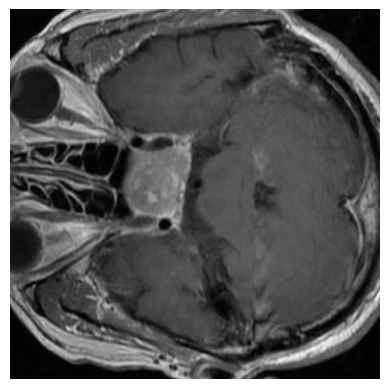

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Base dataset path (update this)
dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"

# Correct folder names
yolo_versions = ["BrainTumorYolov8", "BrainTumorYolov9", "BrainTumorYolov11"]
subdirs = ["train/images", "test/images", "valid/images"]

# Collect all image files
image_files = []
for yolo_version in yolo_versions:
    for subdir in subdirs:
        img_dir = os.path.join(dataset_path, yolo_version, subdir)
        if os.path.exists(img_dir):  # Ensure folder exists
            for file in os.listdir(img_dir):
                if file.lower().endswith((".jpg", ".png", ".jpeg", ".tif", ".bmp")):
                    image_files.append(os.path.join(img_dir, file))

# Show results
if len(image_files) == 0:
    print("❌ No images found! Check folder structure.")
else:
    print(f"✅ Found {len(image_files)} images.")

    # Open the first image to verify
    img = Image.open(image_files[0])  # Open the first image
    plt.imshow(img)  # Display the image
    plt.axis("off")  # Hide axis
    plt.show()  # Show image in Colab


In [ ]:
!pip install scikit-image imagehash



In [ ]:
import os
import numpy as np
import shutil
import imagehash
from skimage.metrics import structural_similarity as ssim
from PIL import Image
from tqdm import tqdm
from collections import defaultdict

# Function to compute perceptual hash (PHash)
def get_phash(image_path, size=(200, 200)):
    try:
        img = Image.open(image_path).convert("L").resize(size)
        return str(imagehash.phash(img))
    except Exception as e:
        print(f"🚨 Error computing PHash for {image_path}: {e}")
        return None

# Function to preprocess an image for SSIM
def preprocess_image(image_path, size=(200, 200)):
    try:
        img = Image.open(image_path).convert("L").resize(size)
        return np.array(img)
    except Exception as e:
        print(f"🚨 Error processing {image_path}: {e}")
        return None

# Function to remove duplicate images using PHash + SSIM
def remove_duplicates(image_files, phash_threshold=10, ssim_threshold=0.90):
    phash_dict = defaultdict(list)
    duplicates = set()

    print("🔍 Computing PHash for images...")
    for img_path in tqdm(image_files):
        phash = get_phash(img_path)
        if phash is not None:
            phash_dict[phash[:4]].append((phash, img_path))

    print("🔍 Running SSIM on similar PHash images...")
    for phash_group in tqdm(list(phash_dict.values())):
        total_images = len(phash_group)
        for i in range(total_images):
            if phash_group[i][1] in duplicates:
                continue

            img1 = preprocess_image(phash_group[i][1])
            if img1 is None:
                continue

            for j in range(i + 1, total_images):
                if phash_group[j][1] in duplicates:
                    continue

                if abs(int(phash_group[i][0], 16) - int(phash_group[j][0], 16)) > phash_threshold:
                    continue

                img2 = preprocess_image(phash_group[j][1])
                if img2 is None:
                    continue

                score = ssim(img1, img2)

                if score >= ssim_threshold:
                    duplicates.add(phash_group[j][1])

    return duplicates

# Step 3: Collect all image paths
image_files = []

# ✅ Corrected dataset path
dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"

yolo_versions = ["BrainTumorYolov8", "BrainTumorYolov9", "BrainTumorYolov11"]
subdirs = ["train/images", "test/images", "valid/images"]

for yolo_version in yolo_versions:
    for subdir in subdirs:
        img_dir = os.path.join(dataset_path, yolo_version, subdir)
        print(f"Checking folder: {img_dir}")

        if os.path.exists(img_dir):
            files = os.listdir(img_dir)
            print(f"📂 Found {len(files)} files in {img_dir}")

            for file in files:
                if file.lower().endswith((".jpg", ".png", ".jpeg", ".tif", ".bmp")):
                    image_files.append(os.path.join(img_dir, file))
        else:
            print(f"🚨 Folder does not exist: {img_dir}")

print(f"🔍 Found {len(image_files)} images in dataset.")

if len(image_files) == 0:
    print("❌ No images found! Check your dataset path and structure.")
else:
    print(f"✅ Starting duplicate removal for {len(image_files)} images...")

    # Step 4: Run optimized duplicate detection
    duplicates = remove_duplicates(image_files)

    print(f"🗑️ Detected {len(duplicates)} duplicate images.")

    if duplicates:
        for duplicate in duplicates:
            os.remove(duplicate)

        print(f"✅ Removed {len(duplicates)} duplicate images.")
    else:
        print("✅ No duplicates found!")


Checking folder: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train/images
📂 Found 2144 files in /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train/images
Checking folder: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/images
📂 Found 308 files in /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/images
Checking folder: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid/images
📂 Found 612 files in /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid/images
Checking folder: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/train/images
📂 Found 2144 files in /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/train/images
Checking folder: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov

100%|██████████| 9192/9192 [00:49<00:00, 186.91it/s]


🔍 Running SSIM on similar PHash images...


100%|██████████| 2212/2212 [00:54<00:00, 40.91it/s]


🗑️ Detected 6128 duplicate images.
✅ Removed 6128 duplicate images.


dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"


In [ ]:
dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"

print("YOLO versions inside dataset:", os.listdir(dataset_path))


YOLO versions inside dataset: ['BrainTumorYolov9', 'BrainTumorYolov11', 'BrainTumorYolov8']


In [ ]:
image_dir = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train/images"
print("Images in train set:", os.listdir(image_dir)[:10])  # Show first 10 images


Images in train set: ['933_jpg.rf.7b98c124aff1d7ea2cbe39022aea5e28.jpg', '2606_jpg.rf.c86ac42f40bbd4507eb7c7e67d8ce114.jpg', '811_jpg.rf.e9cdd05efb9bf4b5034d452d3709f387.jpg', '3006_jpg.rf.c64dffce9f8985a29890759a274ce004.jpg', '522_jpg.rf.17b00bb74dbbacad3cf6fc12b57a8e15.jpg', '1834_jpg.rf.c0e5e1c468a72374f26c08b737658491.jpg', '1467_jpg.rf.fda3cc30354fddd194401a45f7fb3a06.jpg', '1265_jpg.rf.6161edf06de1c606aa326f5da3d2d420.jpg', '1388_jpg.rf.b1b900e7900715305a230a685f83a9fe.jpg', '176_jpg.rf.a39ef23eb08d79f8be8ac8d14be27c29.jpg']


In [ ]:
import os

dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"


for yolo_version in ["BrainTumorYolov8", "BrainTumorYolov9", "BrainTumorYolov11"]:
    for subset in ["train/images", "test/images", "valid/images"]:
        folder_path = os.path.join(dataset_path, yolo_version, subset)
        if os.path.exists(folder_path):
            print(f"{yolo_version} - {subset}: {len(os.listdir(folder_path))} images")
        else:
            print(f"{yolo_version} - {subset} does NOT exist!")


BrainTumorYolov8 - train/images: 2144 images
BrainTumorYolov8 - test/images: 308 images
BrainTumorYolov8 - valid/images: 612 images
BrainTumorYolov9 - train/images: 0 images
BrainTumorYolov9 - test/images: 0 images
BrainTumorYolov9 - valid/images: 0 images
BrainTumorYolov11 - train/images: 0 images
BrainTumorYolov11 - test/images: 0 images
BrainTumorYolov11 - valid/images: 0 images


In [ ]:
import os

dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"

for version in ["BrainTumorYolov9", "BrainTumorYolov11"]:
    for subset in ["train/images", "test/images", "valid/images"]:
        path = os.path.join(dataset_path, version, subset)
        print(f"Checking path: {path} --> Exists? {os.path.exists(path)}")


Checking path: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/train/images --> Exists? False
Checking path: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/test/images --> Exists? False
Checking path: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/valid/images --> Exists? False
Checking path: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/images --> Exists? False
Checking path: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test/images --> Exists? False
Checking path: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/images --> Exists? False


In [ ]:
import shutil
import os

duplicate_yolo8_path = "/content/BrainTumor/BrainTumorYolov8"

if os.path.exists(duplicate_yolo8_path):
    shutil.rmtree(duplicate_yolo8_path)
    print(f"✅ Deleted duplicate: {duplicate_yolo8_path}")
else:
    print(f"❌ Path not found: {duplicate_yolo8_path}")
for version in ["BrainTumorYolov9", "BrainTumorYolov11"]:
    path = os.path.join("/content/BrainTumor", version)
    if os.path.exists(path):
        shutil.rmtree(path)
        print(f"✅ Deleted: {path}")
    else:
        print(f"❌ Not found: {path}")


❌ Path not found: /content/BrainTumor/BrainTumorYolov8
❌ Not found: /content/BrainTumor/BrainTumorYolov9
❌ Not found: /content/BrainTumor/BrainTumorYolov11


In [ ]:
import shutil

for version in ["BrainTumorYolov9", "BrainTumorYolov11"]:
    path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/" + version
    if os.path.exists(path):
        shutil.rmtree(path)
        print(f"✅ Deleted: {path}")
    else:
        print(f"❌ Not found: {path}")


✅ Deleted: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9
✅ Deleted: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11


In [ ]:
dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"

yolo_versions = ["BrainTumorYolov8", "BrainTumorYolov9", "BrainTumorYolov11"]
subsets = ["train/labels", "test/labels", "valid/labels"]

for yolo_version in yolo_versions:
    for subset in subsets:
        folder_path = os.path.join(dataset_path, yolo_version, subset)
        if os.path.exists(folder_path):
            print(f"{yolo_version} - {subset}: {len(os.listdir(folder_path))} label files")
        else:
            print(f"{yolo_version} - {subset} does NOT exist!")


BrainTumorYolov8 - train/labels: 2144 label files
BrainTumorYolov8 - test/labels: 308 label files
BrainTumorYolov8 - valid/labels: 612 label files
BrainTumorYolov9 - train/labels does NOT exist!
BrainTumorYolov9 - test/labels does NOT exist!
BrainTumorYolov9 - valid/labels does NOT exist!
BrainTumorYolov11 - train/labels does NOT exist!
BrainTumorYolov11 - test/labels does NOT exist!
BrainTumorYolov11 - valid/labels does NOT exist!


In [ ]:
import os

dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8"

for subset in ["train", "test", "valid"]:
    folder_path = os.path.join(dataset_path, subset)
    print(f"Contents of {subset}: {os.listdir(folder_path)}")


Contents of train: ['images', 'labels']
Contents of test: ['images', 'labels']
Contents of valid: ['images', 'labels']


In [ ]:
with open(os.path.join(dataset_path, "data.yaml"), "r") as f:
    print(f.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['glioma', 'meningioma', 'pituitary']




In [ ]:
import os

dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8"

print("Folders inside BrainTumorYolov8:", os.listdir(dataset_path))



Folders inside BrainTumorYolov8: ['train', 'valid', 'test', 'data.yaml']


In [ ]:
folder_path = os.path.join(dataset_path, "BrainTumorYolov8", subset)


In [ ]:
for subset in ["train/labels", "test/labels", "valid/labels"]:
    folder_path = os.path.join(dataset_path, subset)
    if os.path.exists(folder_path):
        print(f"{subset}: {len(os.listdir(folder_path))} label files")
    else:
        print(f"{subset} does NOT exist!")

train/labels: 2144 label files
test/labels: 308 label files
valid/labels: 612 label files


In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths
dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8"

image_size = (224, 224)  # Resize images to 224x224 for Xception

# Classes for classification
classes = ["glioma", "meningioma", "pituitary", "no_tumor"]
num_classes = len(classes)

# Function to load images and labels
def load_data(images_folder, labels_folder):
    images = []
    labels = []

    for file in os.listdir(images_folder):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(images_folder, file)
            label_path = os.path.join(labels_folder, file.rsplit('.', 1)[0] + ".txt")  # Handles different extensions

            # Read and preprocess image
            img = load_img(img_path, target_size=image_size)
            img = img_to_array(img) / 255.0  # Normalize pixels (0-1)
            images.append(img)

            # Read label file
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    label_data = f.readline().strip()
                    label_index = int(label_data.split()[0])  # Assuming class index is first value
                    labels.append(label_index)
            else:
                print(f"⚠️ Missing label for {file}")
                labels.append(-1)  # Assign unknown class

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Remove images with missing labels (-1)
    valid_indices = labels != -1
    return images[valid_indices], labels[valid_indices]

# Load train, test, and valid data
X_train, y_train = load_data(
    os.path.join(dataset_path, "train/images"),
    os.path.join(dataset_path, "train/labels")
)
X_test, y_test = load_data(
    os.path.join(dataset_path, "test/images"),
    os.path.join(dataset_path, "test/labels")
)
X_valid, y_valid = load_data(
    os.path.join(dataset_path, "valid/images"),
    os.path.join(dataset_path, "valid/labels")
)

# Ensure labels are valid (not -1) before encoding
y_train = y_train[y_train >= 0]
y_test = y_test[y_test >= 0]
y_valid = y_valid[y_valid >= 0]

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_valid = to_categorical(y_valid, num_classes)

print(f"✅ Loaded dataset: Train={X_train.shape}, Test={X_test.shape}, Valid={X_valid.shape}")


✅ Loaded dataset: Train=(2144, 224, 224, 3), Test=(308, 224, 224, 3), Valid=(612, 224, 224, 3)


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load Xception model (without top layers)
base_model = Xception(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# New code Added
for layer in xception_base.layers[:100]:
    layer.trainable = False
# till here

#xception_features = GlobalAveragePooling2D()(xception_base.output)
#xception_features = Dropout(0.6)(xception_features)

x =  base_model.output

x = GlobalAveragePooling2D()(x)

x = Dropout(0.6)(x)

x = Dense(256, activation = "relu")(x)

x = Dropout(0.4)(x)

output = Dense(num_classes , activation = "softmax")(x)

model = Model(inputs = base_model.input , outputs = output)




KeyboardInterrupt: 

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(patience=3, factor=0.2, verbose=1)
]


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 93s 599ms/step - accuracy: 0.2187 - loss: 1.5010 - val_accuracy: 0.4722 - val_loss: 1.1694 - learning_rate: 1.0000e-05
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 43s 456ms/step - accuracy: 0.5416 - loss: 1.1332 - val_accuracy: 0.4722 - val_loss: 1.0511 - learning_rate: 1.0000e-05
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 42s 469ms/step - accuracy: 0.6840 - loss: 0.8715 - val_accuracy: 0.4837 - val_loss: 1.0053 - learning_rate: 1.0000e-05
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 463ms/step - accuracy: 0.7693 - loss: 0.6913 - val_accuracy: 0.5065 - val_loss: 0.9206 - learning_rate: 1.0000e-05
Epoch 5/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 469ms/step - accuracy: 0.8452 - loss: 0.5017 - val_accuracy: 0.5686 - val_loss: 0.7998 - learning_rate: 1.0000e-05
Epoch 6/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 469ms/step - accuracy: 0.8787 - loss: 0.3849 - val_accuracy: 0.6422 - val_loss: 0.6891 - learning_rate: 1.0000e-05
Epoch 7/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 466ms/step - acc

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 594ms/step - accuracy: 0.9380 - loss: 0.1963
🧪 Test Accuracy: 0.9318


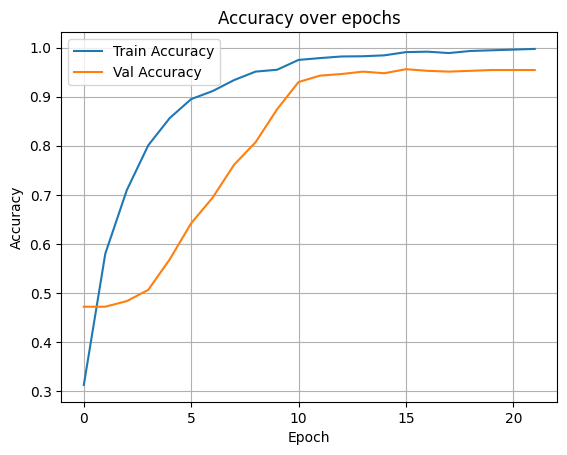

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"🧪 Test Accuracy: {acc:.4f}")
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


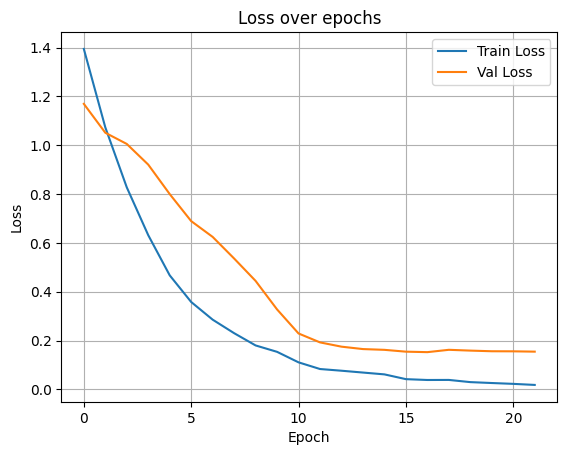

In [ ]:

# Plot loss too
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.save("brain_tumor_xception_model.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("brain_tumor_xception_model.h5")


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Define the same class labels used during training
classes = ["glioma", "meningioma", "pituitary", "no_tumor"]

def predict_image(model, image_path):
    # Load and preprocess image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])

    # Show result
    plt.imshow(img)
    plt.title(f"Predicted: {classes[predicted_class]}")
    plt.axis('off')
    plt.show()

    print("📊 Prediction Probabilities:")
    for i, prob in enumerate(prediction[0]):
        print(f"{classes[i]}: {prob:.4f}")

    print(f"\n✅ Final Prediction: {classes[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


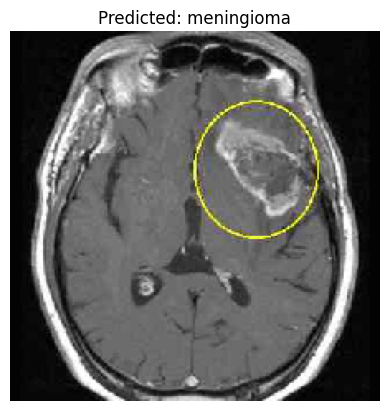

📊 Prediction Probabilities:
glioma: 0.4364
meningioma: 0.5085
pituitary: 0.0351
no_tumor: 0.0200

✅ Final Prediction: meningioma


In [ ]:
predict_image(model, "/content/BrainTumorTestImageGlioma.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


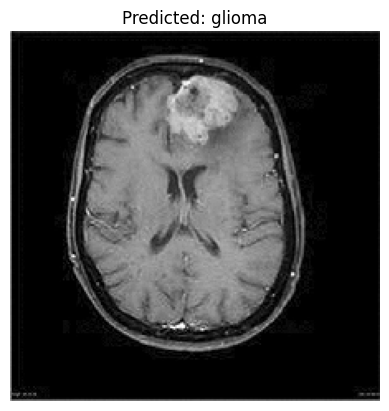

📊 Prediction Probabilities:
glioma: 0.9356
meningioma: 0.0525
pituitary: 0.0113
no_tumor: 0.0006

✅ Final Prediction: glioma


In [ ]:
predict_image(model, "/content/BrainTumorTestImage.jpg")

